<a href="https://colab.research.google.com/github/ritwiks9635/Segmentation-Model/blob/main/Atrial_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Left Atrial Segmentation Using NII DOC.**

##**WHAT IS NII**

- **NII files mostly belong to NIfTI-1 Data Format by Neuroimaging Informatics Technology Initiative. NIfTI-1 is adapted from the widely used ANALYZE 7.5 file format. The hope is that older non-NIfTI-aware software that uses the ANALYZE 7.5 format will still be compatible with NIfTI-1.**



**Identifier**: Hex: 00 00 01 5C 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00



- **You need a suitable software like NIfTI-1 Data Format from Neuroimaging Informatics Technology Initiative to open a NII file. Without proper software you will receive a Windows message "How do you want to open this file?" or "Windows cannot open this file" or a similar Mac/iPhone/Android alert.**

In [1]:
#https://www.kaggle.com/datasets/adarshsng/heart-mri-image-dataset-left-atrial-segmentation

In [ ]:
!unzip /content/https:/www.kaggle.com/datasets/adarshsng/heart-mri-image-dataset-left-atrial-segmentation/heart-mri-image-dataset-left-atrial-segmentation.zip

In [4]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<ipython-input-4-1bf4d3ae0c49>:22: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [5]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [6]:
Data_NII_Path_Sam = "/content/imagesTr/la_016.nii"

Label_NII_Path_Sam = "/content/labelsTr/la_016.nii"

In [7]:
Data_NII_Path_Sam_Red = nib.load(Data_NII_Path_Sam)
Label_NII_Path_Sam_Red = nib.load(Label_NII_Path_Sam)

In [8]:
print(type(Data_NII_Path_Sam_Red))

<class 'nibabel.nifti1.Nifti1Image'>


In [9]:
print(Data_NII_Path_Sam_Red)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 90)
affine: 
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code    

In [10]:
print(Data_NII_Path_Sam_Red.affine)

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [11]:
print(Data_NII_Path_Sam_Red.extra)

{}


In [12]:
print(Data_NII_Path_Sam_Red.dataobj.dtype)

float32


In [13]:
print(Data_NII_Path_Sam_Red.get_data_dtype())

float32


In [14]:
print(Data_NII_Path_Sam_Red.get_filename())

/content/imagesTr/la_016.nii


In [15]:
print(Data_NII_Path_Sam_Red.get_fdata())

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [16]:
print(Data_NII_Path_Sam_Red.file_map.keys())

dict_keys(['image'])


In [17]:
print(Data_NII_Path_Sam_Red.file_map.items())

dict_items([('image', <nibabel.fileholders.FileHolder object at 0x7aac8c10b610>)])


In [18]:
print(Data_NII_Path_Sam_Red.file_map["image"].filename)

/content/imagesTr/la_016.nii


In [19]:
print(Data_NII_Path_Sam_Red.get_qform())

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [20]:
print(Data_NII_Path_Sam_Red.get_data())

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [21]:
print(Data_NII_Path_Sam_Red.get_data().shape)

(320, 320, 90)


In [22]:
print(Data_NII_Path_Sam_Red.get_data()[0].shape)

(320, 90)


In [23]:
Example_ALL_Images = Data_NII_Path_Sam_Red.get_data()
Example_ALL_Labels = Label_NII_Path_Sam_Red.get_data()

In [24]:
print(Example_ALL_Images[0].shape)
print(Example_ALL_Labels[0].shape)

(320, 90)
(320, 90)


In [25]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


In [26]:
print(Example_ALL_Images.shape[0]//2)

160


In [27]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2])

[[ 48.  68.  46. ... 273. 276. 261.]
 [ 44.  55.  39. ... 283. 276. 240.]
 [ 46.  39.  33. ... 252. 251. 211.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


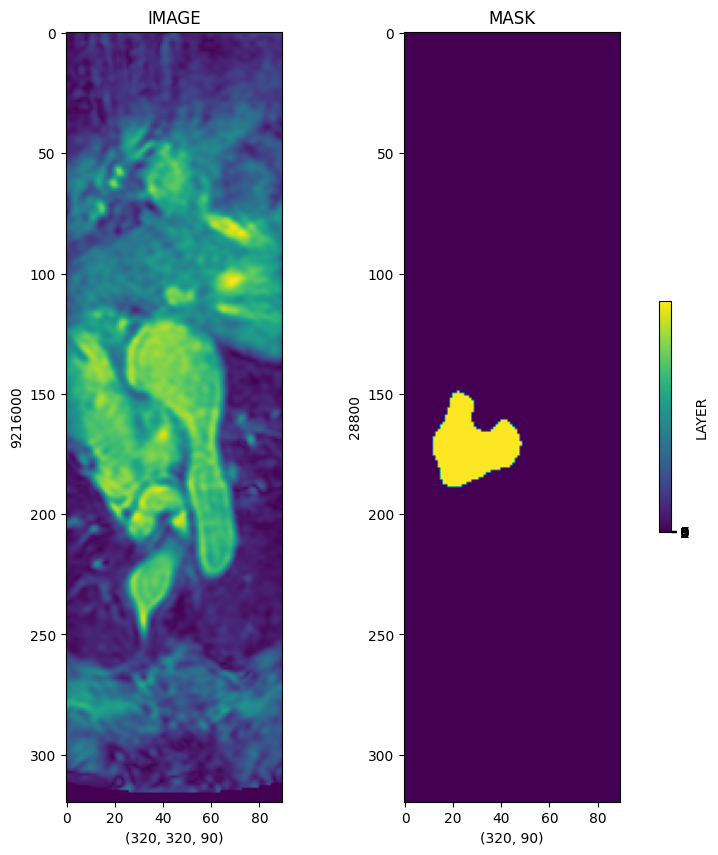

In [28]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2])
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2])
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

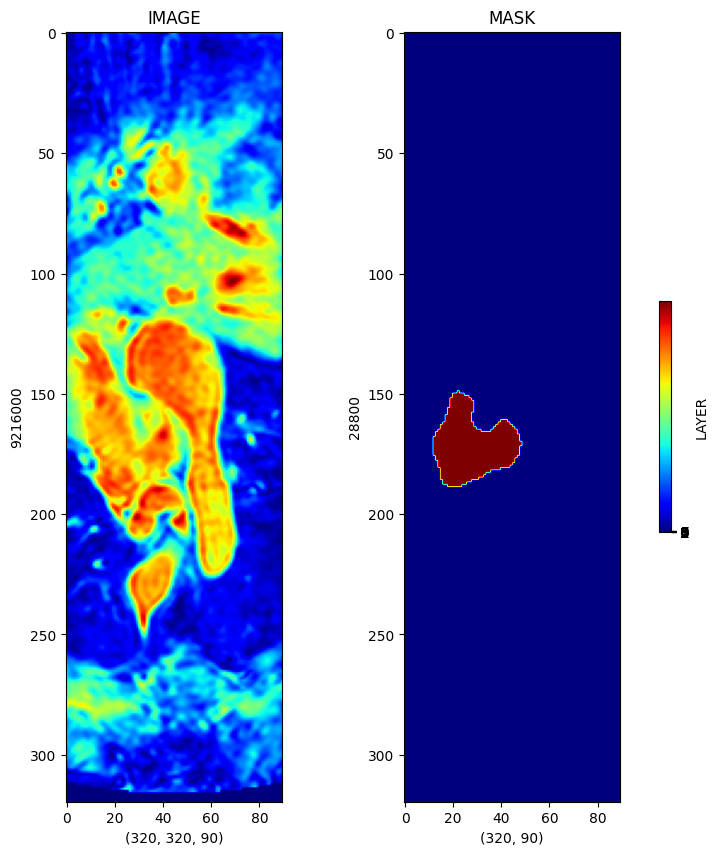

In [29]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

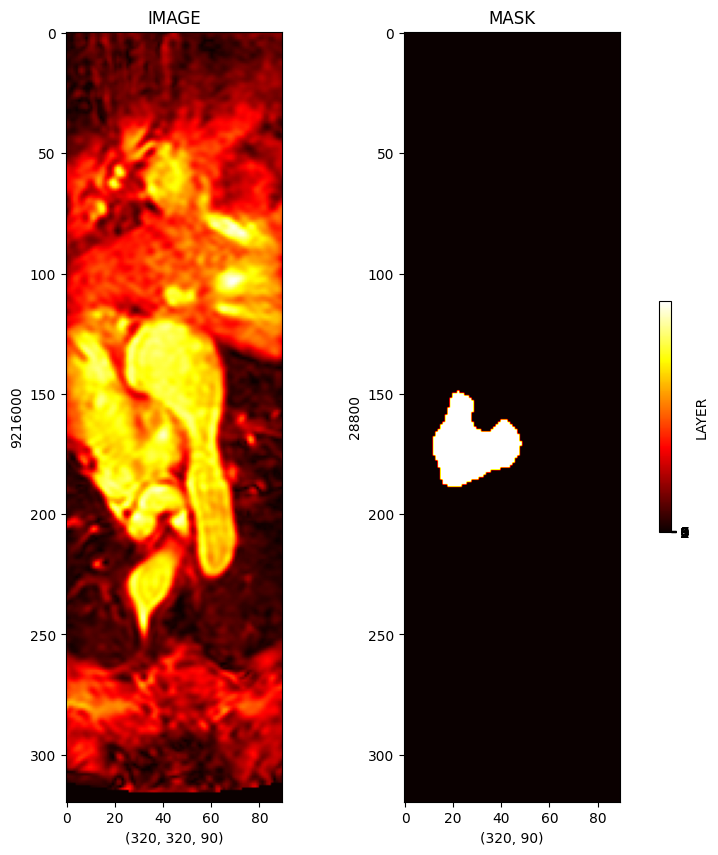

In [30]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

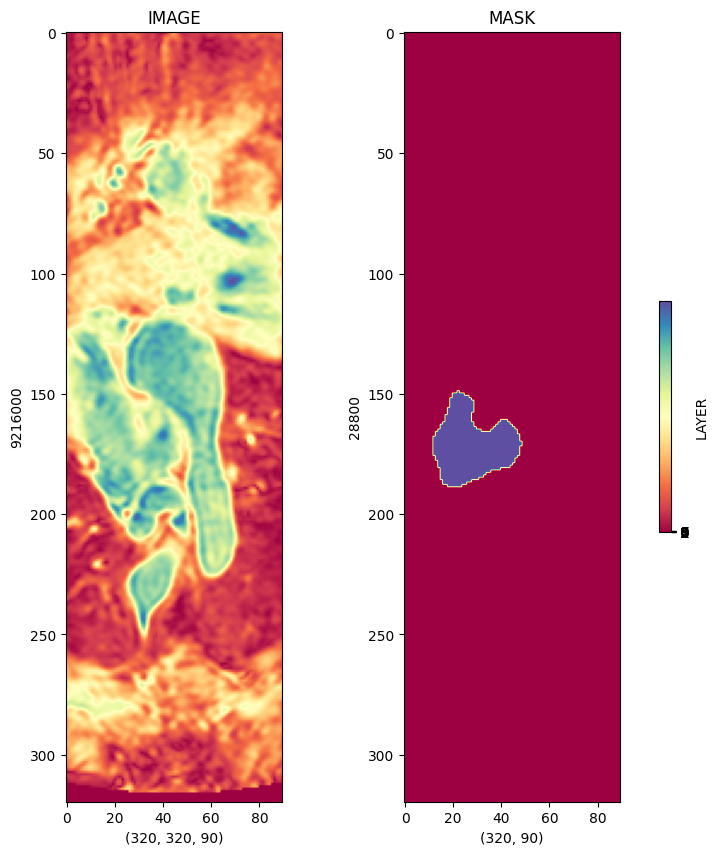

In [31]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

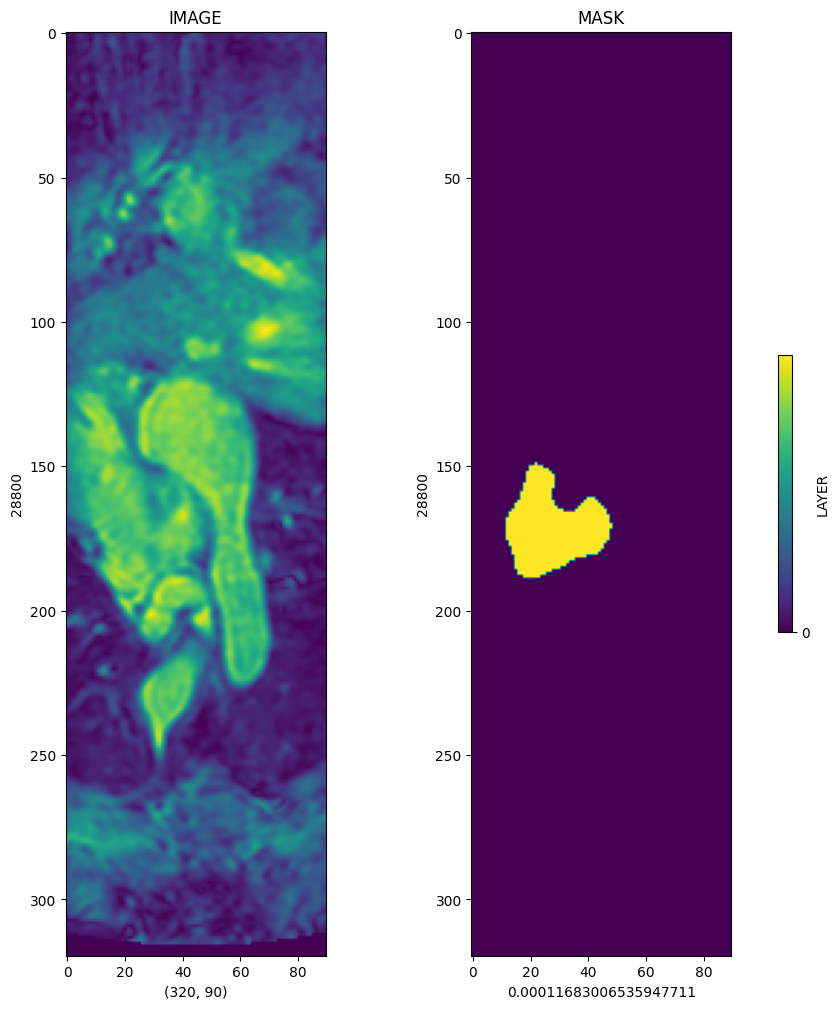

In [32]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Example_ALL_Images[Example_ALL_Images.shape[0]//2] / 255.
Picking_Example_Label = Example_ALL_Labels[Example_ALL_Images.shape[0]//2] / 255.

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

Plot_Color_Op = axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

In [33]:
Data_NII_Paths = Path("/content/imagesTr")
Label_NII_Paths = Path("/content/labelsTr")

In [34]:
os.listdir(Data_NII_Paths)

['la_017.nii',
 'la_007.nii',
 'la_020.nii',
 'la_030.nii',
 'la_009.nii',
 'la_026.nii',
 'la_018.nii',
 'la_005.nii',
 'la_024.nii',
 'la_029.nii',
 '._la_029.nii.gz',
 'la_021.nii',
 'la_016.nii',
 'la_019.nii',
 'la_003.nii',
 'la_014.nii',
 'la_004.nii',
 'la_022.nii',
 'la_011.nii',
 'la_010.nii',
 'la_023.nii']

In [35]:
NII_Images = list(Data_NII_Paths.glob(r"*.nii"))
NII_Labels = list(Label_NII_Paths.glob(r"*.nii"))

In [36]:
print("Total Images ::", len(NII_Images))
print("Total Labels ::", len(NII_Labels))

Total Images :: 20
Total Labels :: 20


In [37]:
Images_Series = pd.Series(NII_Images,name="IMAGE").astype(str)
Labels_Series = pd.Series(NII_Labels,name="LABEL").astype(str)

In [38]:
Main_Data = pd.concat([Images_Series,Labels_Series],axis=1)

In [39]:
Main_Data.head()

IMAGE                         LABEL
0  /content/imagesTr/la_017.nii  /content/labelsTr/la_017.nii
1  /content/imagesTr/la_007.nii  /content/labelsTr/la_007.nii
2  /content/imagesTr/la_020.nii  /content/labelsTr/la_020.nii
3  /content/imagesTr/la_030.nii  /content/labelsTr/la_030.nii
4  /content/imagesTr/la_009.nii  /content/labelsTr/la_009.nii

In [40]:
Or_1_0 = []
Image_List = []
Label_List = []

for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)

    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()

    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.

    if np.mean(Selecting_Label) > 0:
        Or_1_0.append(1)
        Selecting_Image = Selecting_Image.astype("float32")
        Selecting_Label = Selecting_Label.astype("float32")

        Image_List.append(Selecting_Image)
        Label_List.append(Selecting_Label)
    else:
        Or_1_0.append(0)

In [41]:
for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):
    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)

    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()

    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.

    print(np.shape(Selecting_Image))
    print(np.shape(Selecting_Label))
    print("---"*20)

(320, 120)
(320, 120)
------------------------------------------------------------
(320, 130)
(320, 130)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 122)
(320, 122)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 109)
(320, 109)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 90)
(320, 90)
------------------------------------------------------------
(320, 

In [42]:
print(Or_1_0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [43]:
print(len(Or_1_0))

20


In [44]:
Main_Data["1_OR_0"] = Or_1_0

In [45]:
Main_Data.head()

IMAGE                         LABEL  1_OR_0
0  /content/imagesTr/la_017.nii  /content/labelsTr/la_017.nii       1
1  /content/imagesTr/la_007.nii  /content/labelsTr/la_007.nii       1
2  /content/imagesTr/la_020.nii  /content/labelsTr/la_020.nii       1
3  /content/imagesTr/la_030.nii  /content/labelsTr/la_030.nii       1
4  /content/imagesTr/la_009.nii  /content/labelsTr/la_009.nii       1

In [46]:
print("Total Images ::", len(Image_List))
print("Total Labels ::", len(Label_List))

Total Images :: 18
Total Labels :: 18


In [47]:
print(Image_List[0].shape)
print(Label_List[0].shape)

(320, 120)
(320, 120)


In [48]:
print(type(Image_List[0]))
print(type(Label_List[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


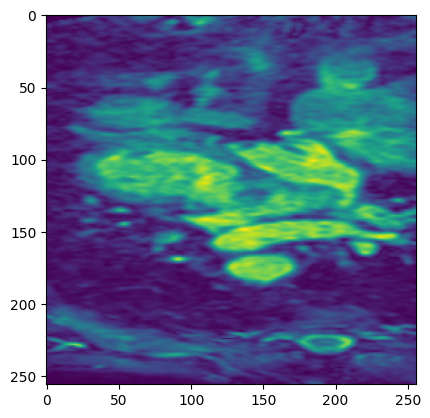

In [49]:
Testing_Trans = cv2.resize(Image_List[8],(256,256))
plt.imshow(Testing_Trans)

In [50]:
True_Seg = Main_Data[Main_Data["1_OR_0"] == 1]

In [51]:
Image_List = []
Label_List = []

for i_img,i_mask in zip(True_Seg["IMAGE"].values,True_Seg["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)

    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()

    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.

    Selecting_Image = Selecting_Image.astype("float32")
    Selecting_Label = Selecting_Label.astype("float32")

    Resized_IMG = cv2.resize(Selecting_Image,(256,256))
    Resized_LABEL = cv2.resize(Selecting_Label,(256,256))

    Image_List.append(Resized_IMG)
    Label_List.append(Resized_LABEL)

In [52]:
for indexing_i in range(len(Image_List)):
    print("---"*10)
    print(Image_List[indexing_i].shape)
    print(Label_List[indexing_i].shape)

------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)


In [53]:
print(np.shape(np.array(Image_List)))
print(np.shape(np.array(Label_List)))

(18, 256, 256)
(18, 256, 256)


Text(0.5, 1.0, 'MASK')

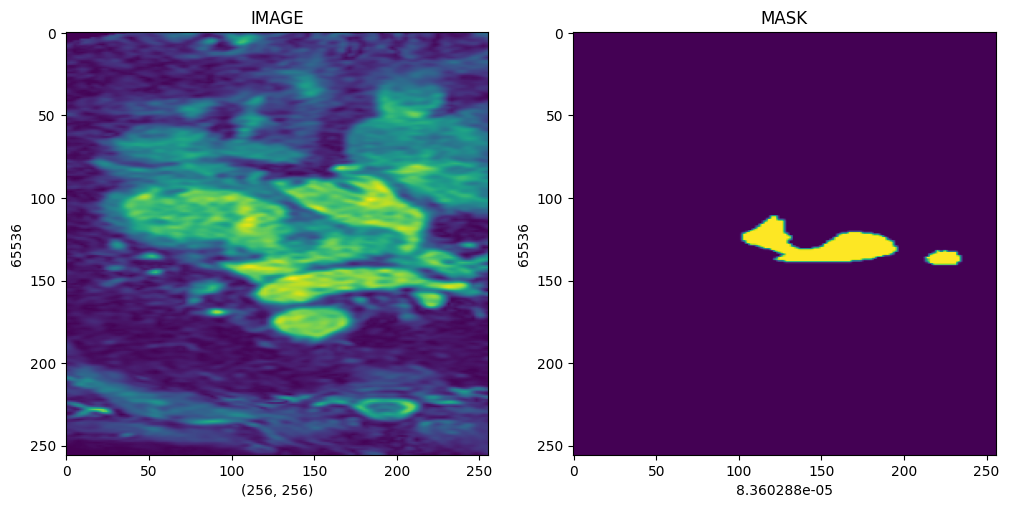

In [54]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[8]
Picking_Example_Label = Label_List[8]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

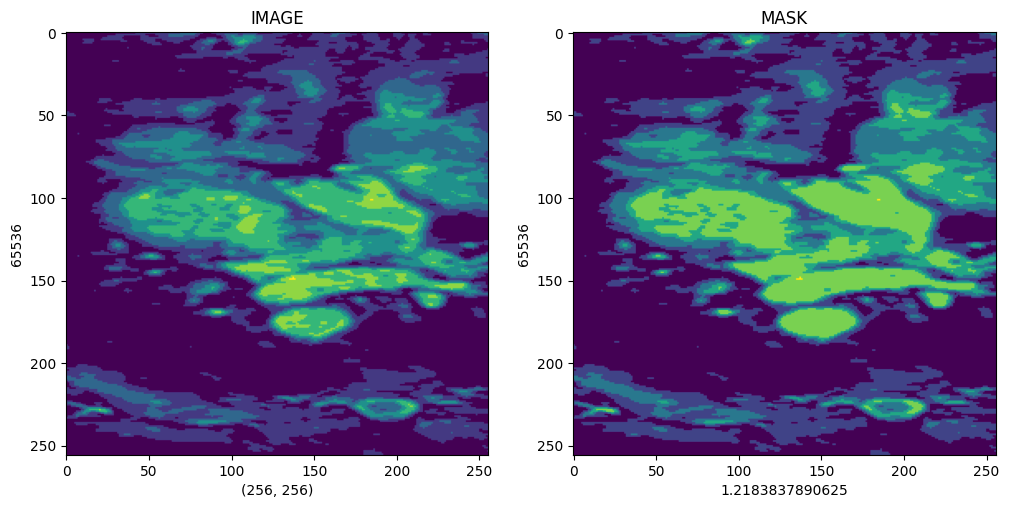

In [55]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[8]
Picking_Example_Label = Label_List[8]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

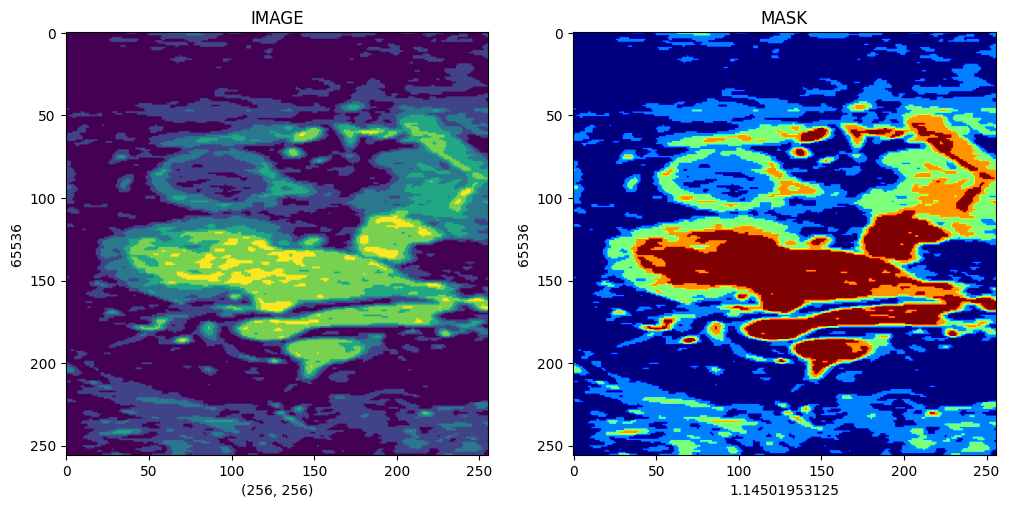

In [56]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="jet")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

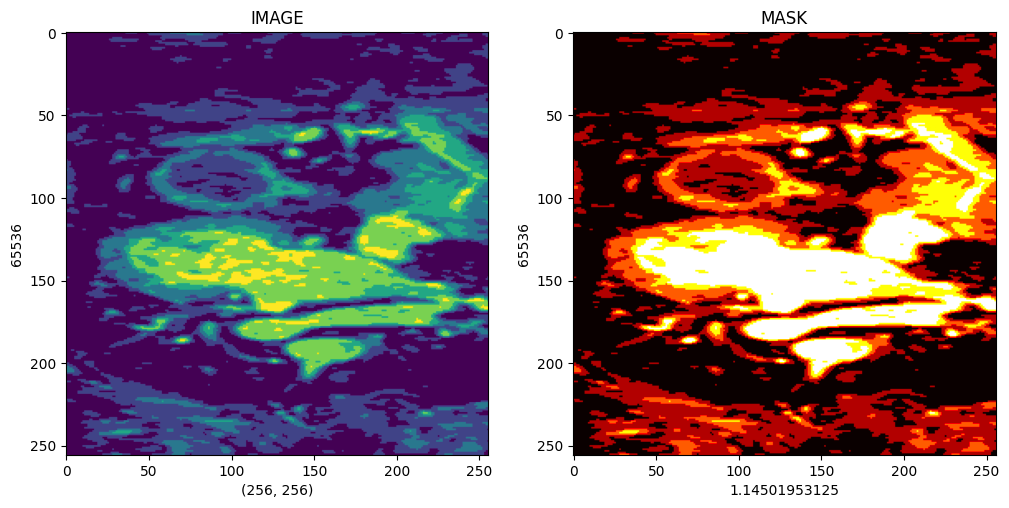

In [57]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="hot")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

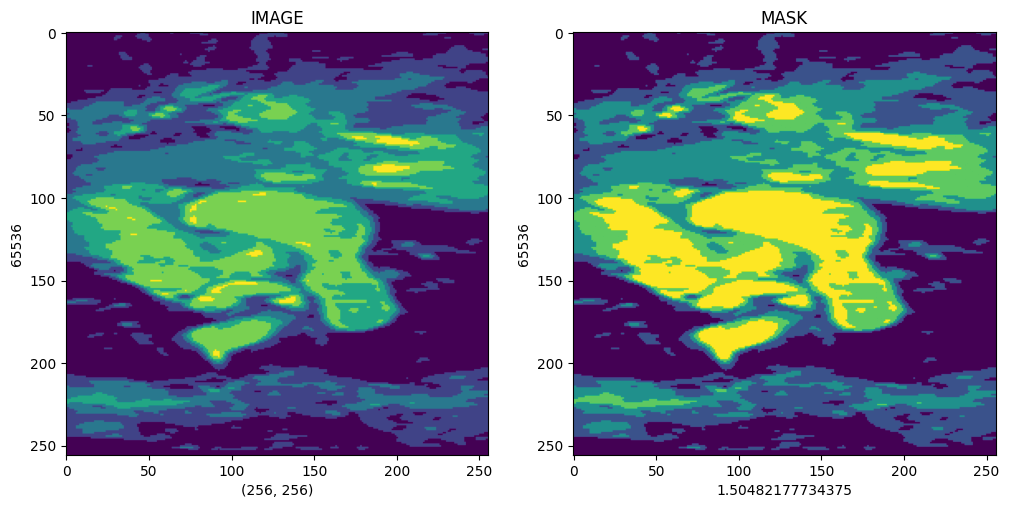

In [58]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

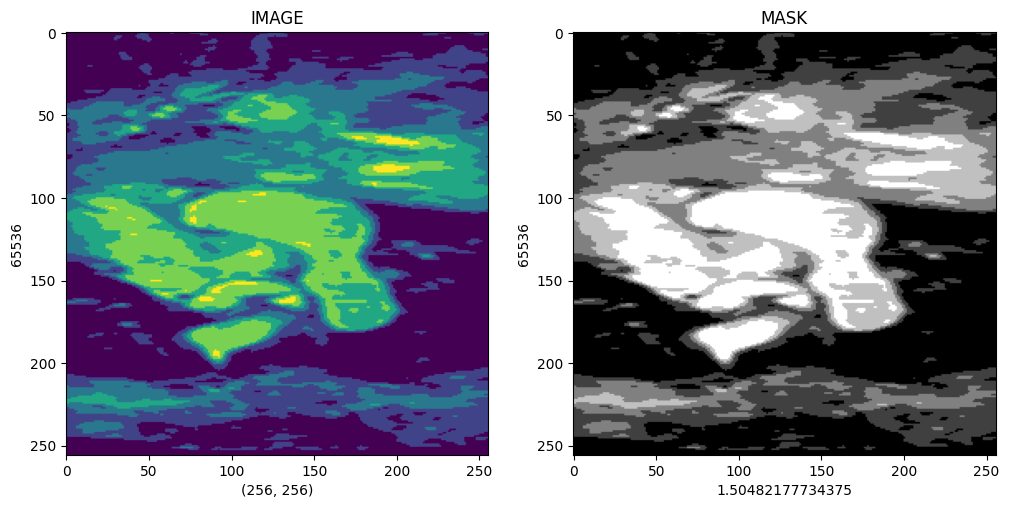

In [59]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="gray")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

In [66]:
X_Train = np.array(Image_List, dtype = "float32")
Y_Train = np.array(Label_List, dtype = "float32")


print(X_Train.shape)
print(Y_Train.shape)

(18, 256, 256)
(18, 256, 256)


In [68]:
X_Train = X_Train.reshape(X_Train.shape[0], X_Train.shape[1], X_Train.shape[2], 1)
Y_Train = Y_Train.reshape(Y_Train.shape[0], Y_Train.shape[1], Y_Train.shape[2], 1)

print(X_Train.shape)
print(Y_Train.shape)

(18, 256, 256, 1)
(18, 256, 256, 1)


In [105]:
encoder = keras.Sequential()

encoder.add(layers.Conv2D(32, (5, 5), kernel_initializer = "he_normal", use_bias = True))
encoder.add(layers.BatchNormalization())
encoder.add(layers.ReLU())

encoder.add(layers.Conv2D(64, (5, 5), kernel_initializer = "he_normal", use_bias = True))
encoder.add(layers.BatchNormalization())
encoder.add(layers.ReLU())

encoder.add(layers.Conv2D(128, (2, 2), kernel_initializer = "he_normal", use_bias = True))
encoder.add(layers.BatchNormalization())
encoder.add(layers.ReLU())

encoder.add(layers.Conv2D(128, (2, 2), kernel_initializer = "he_normal", use_bias = True))
encoder.add(layers.BatchNormalization())
encoder.add(layers.ReLU())


decoder = keras.Sequential()

decoder.add(layers.Conv2DTranspose(128, (2, 2)))
decoder.add(layers.ReLU())

decoder.add(layers.Conv2DTranspose(64, (2, 2)))
decoder.add(layers.ReLU())

decoder.add(layers.Conv2DTranspose(32, (5, 5)))
decoder.add(layers.ReLU())

decoder.add(layers.Conv2DTranspose(1, (5, 5)))

model_st = keras.Sequential([encoder, decoder])

In [106]:
model_st.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.0000001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

In [107]:
model_st.fit(X_Train[0:-1], Y_Train[0:-1], epochs = 100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.1323 - accuracy: 0.9387
Epoch 2/100
1/1 [==============================] - 1s 676ms/step - loss: 0.1320 - accuracy: 0.9388
Epoch 3/100
1/1 [==============================] - 1s 696ms/step - loss: 0.1318 - accuracy: 0.9388
Epoch 4/100
1/1 [==============================] - 1s 685ms/step - loss: 0.1315 - accuracy: 0.9389
Epoch 5/100
1/1 [==============================] - 1s 681ms/step - loss: 0.1312 - accuracy: 0.9390
Epoch 6/100
1/1 [==============================] - 1s 694ms/step - loss: 0.1310 - accuracy: 0.9390
Epoch 7/100
1/1 [==============================] - 1s 688ms/step - loss: 0.1307 - accuracy: 0.9391
Epoch 8/100
1/1 [==============================] - 1s 698ms/step - loss: 0.1305 - accuracy: 0.9391
Epoch 9/100
1/1 [==============================] - 1s 694ms/step - loss: 0.1302 - accuracy: 0.9392
Epoch 10/100
1/1 [==============================] - 1s 694ms/step - loss: 0.1300 - accuracy: 0.9393
Epoch 11/100

In [108]:
Prediction_MASK = model_st.predict(X_Train[:10])

1/1 [==============================] - 0s 169ms/step


Text(0.5, 1.0, 'PREDICTION')

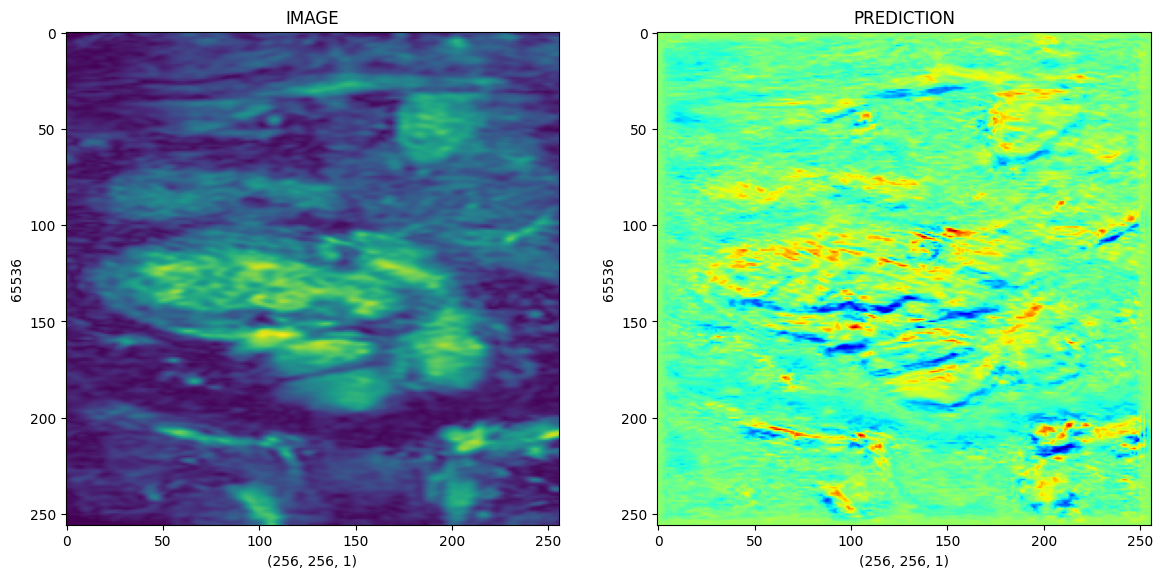

In [110]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 1

Original_Img = X_Train[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask, cmap = "jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

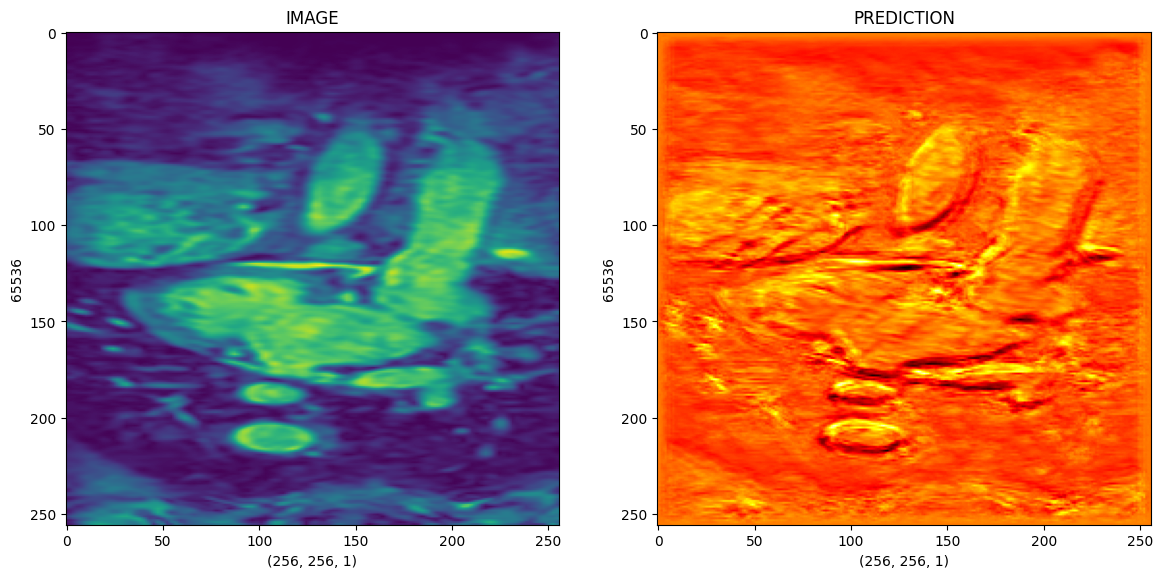

In [111]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 2

Original_Img = X_Train[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask, cmap = "hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

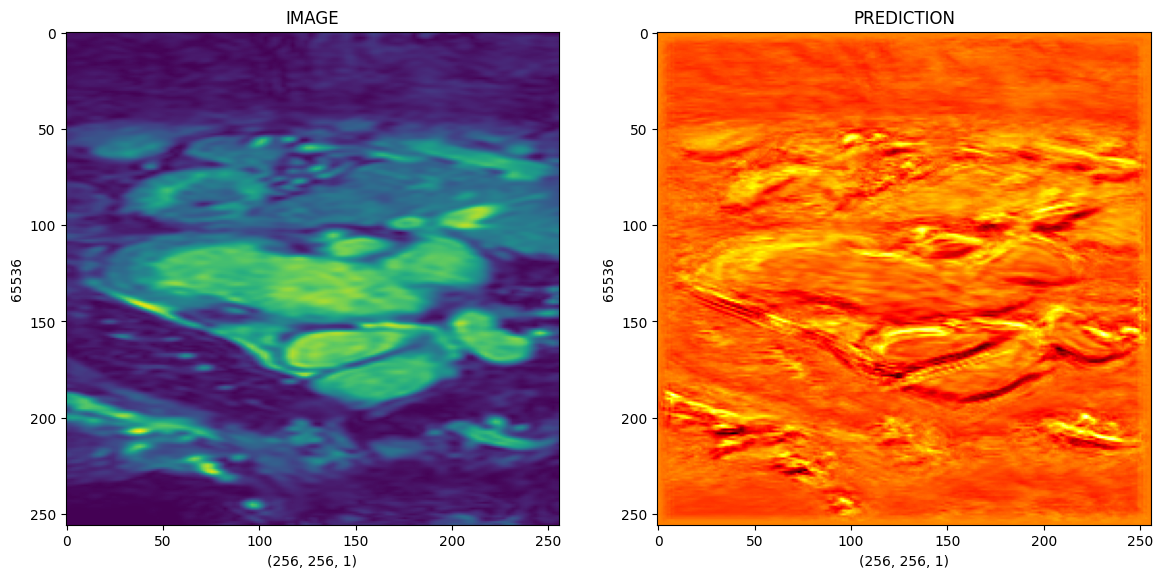

In [113]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 3

Original_Img = X_Train[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

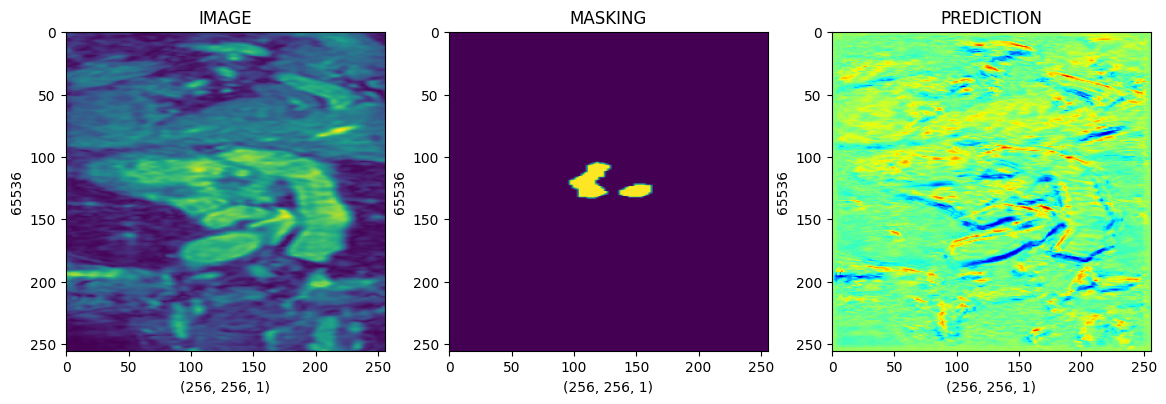

In [115]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 9

Original_Img = X_Train[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = Y_Train[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

In [117]:
Prediction_NON_SEEN = model_st.predict(X_Train[17:])

1/1 [==============================] - 2s 2s/step


Text(0.5, 1.0, 'PREDICTION')

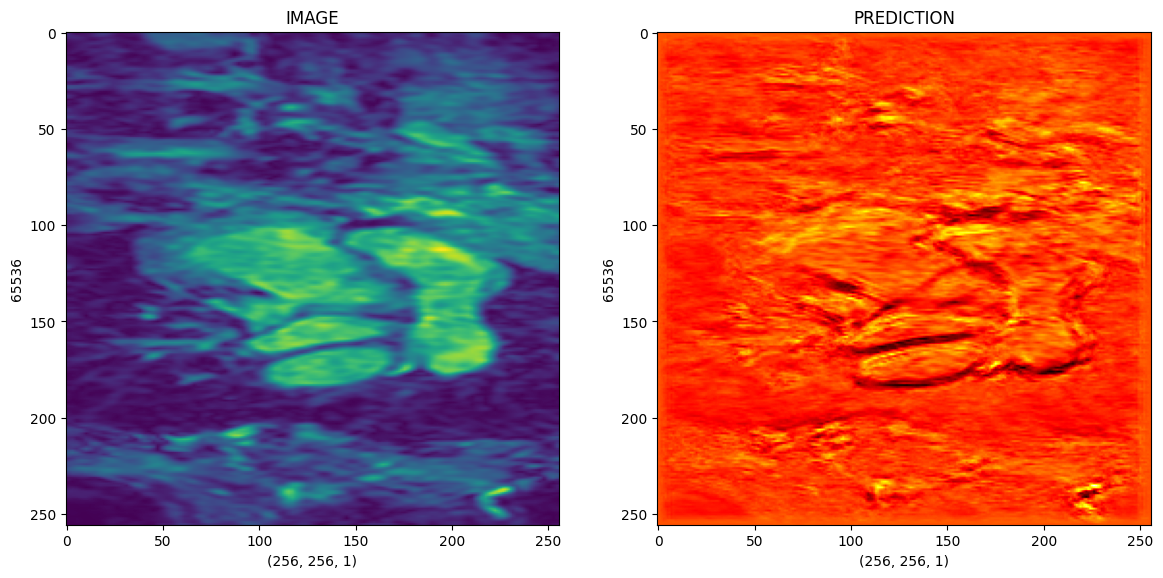

In [118]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 17

Original_Img = X_Train[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")